:<div style="text-align:center"><h1>Spatio-Temporal Dynamics of a Metacoupled World</h1></div>

<div style="text-align:center"><h4>I-GUIDE Summer School</h4></div>
<div style="text-align:center"><h4>Monday Aug 7 – Friday Aug 11, 2023</h4></div>
<div style="text-align:center"><h4>Boulder, Colorado</h4></div>

## Team 5
**Team leader**
* Min Gon Chung, mingon.chung@gmail.com

**Team members**
* Kate Brandt, kebrandt@live.unc.edu
* Qingqing Chen, qchen47@buffalo.edu
* Keiko Nomura, nomurak@oregonstate.edu
* Maryam Torkashvand, maryam-torkashvand@uiowa.edu
* Alexi Vogel, aevogel2@asu.edu
* Jinwen Xu, jinwxu@fiu.edu
* Hao Yang, hy96161@uga.edu

# 1. Project Description

The world is increasingly interconnected environmentally and socioeconomically through various flows (e.g., movement of goods, services, people, capital). Such flows have enormous impacts on biodiversity, ecosystem services, and sustainable development globally. However, little research has been systematically conducted on such flows across multiple scales (global, regional, national) simultaneously. In this effort, we apply the frameworks of metacoupling (human-nature interactions within and across adjacent/distant systems) and telecoupling (human-nature interactions between distant systems) and use open-source time-series data (e.g., merchandise and service trade) to analyze key linkages among different United Nations regions and among sub-regions/countries within each region.

We conducted six primary types of analyses. One was at the global level, emphasizing the connections between different regions. The remaining five were regional (Americas, Africa, Europe, Asia, Oceania) highlighting the relationships between each specific region and other regions, as well as key connections among sub-regions within each region.

The workflow is divided into three main steps:

* Data Cleaning
* Creating Circos
* Network Analysis

Given the project's extensive global scope, where both the data and results are vast, we provide only a demonstration of each step in this Notebook.

# 2. Working Flows

## Step 1. Data Cleaning
In first step, we accomplished data cleaning and processing.

This step involved cleaning (removing duplicates, NaN values) and filtering the dataset from UN Comtrade (https://comtradeplus.un.org/). We filtered the data for the three years spanning 2019 to 2021. As our focus is on observing changes in interaction between regions and countries regarding one service (**Medical**) and one merchandise (**Crop**), we extracted data for these two items. Additionally, each team member compiled the dataset based on their specific case study.









In [ ]:
#Instaling Packages
install.packages(c("plyr", "dplyr", "stringr"))

Warning message in install.packages(c("plyr", "dplyr", "stringr")):
“'lib = "/cvmfs/cybergis.illinois.edu/software/conda/cybergisx/r-0.8.0/lib/R/library"' is not writable”


ERROR: Error in install.packages(c("plyr", "dplyr", "stringr")): unable to install packages


In [ ]:
#Instaling Packages
install.packages("igraph")

Warning message in install.packages("igraph"):
“'lib = "/cvmfs/cybergis.illinois.edu/software/conda/cybergisx/r-0.8.0/lib/R/library"' is not writable”


ERROR: Error in install.packages("igraph"): unable to install packages


In [ ]:
install.packages("circlize")

also installing the dependencies ‘GlobalOptions’, ‘shape’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [ ]:
install.packages("reshape2")

Warning message in install.packages("reshape2"):
“installation of package ‘reshape2’ had non-zero exit status”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [ ]:
install.packages("reshape2", type = "binary")

ERROR: Error in install.packages("reshape2", type = "binary"): type 'binary' is not supported on this platform


In [ ]:
install.packages('IRdisplay')

Warning message in install.packages("IRdisplay"):
“'lib = "/cvmfs/cybergis.illinois.edu/software/conda/cybergisx/r-0.8.0/lib/R/library"' is not writable”


ERROR: Error in install.packages("IRdisplay"): unable to install packages


In [ ]:
#import libraries
#library(reshape2)
library(plyr)
library(dplyr)
library(stringr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




Note: the first step cannot be excecuted here in this stage as we done all the project in coding softwares and using files in local directories. we provide the codes in this notebook. However, we upload one data as an example for the step 2 and step 3.

In [27]:
file_path <- getwd()

In [30]:
file_path

ERROR: Error in eval(expr, envir, enclos): object 'file_path' not found


In [33]:
# Step 1: Data_Processing
# reading the large daataset and producing clean .csv files

rm(list=ls())
# setting work directory
# setwd ("/home/jovyan/work/summer-school23-team5/data")
file_path <- getwd()
## country.list
dist <- read.csv(paste0(file_path,"/data/World_countries_eez_matrix_ISO3__1980_2010s.csv"), header=T, stringsAsFactors=FALSE)
country <- read.csv(paste0(file_path,"/data/UNCTAD_country_code_hchl_dac_m49.csv"), header=T, stringsAsFactors=FALSE)
country.iso3 <- country$iso3
country.uncode <- country$un.code

## rbind all years (2019-2021)
# input.dir <- "Path_of_input_files"
# setwd(paste0(input.dir))

un.data <- list.files(path = paste0(file_path,"/data/raw_data"),recursive=T, pattern="*.csv")

un.data.csv <- lapply(un.data, function(i) {read.csv(paste0(file_path,"/data/raw_data/",i) , header=T, stringsAsFactors=FALSE)})
un.data.all <- do.call("rbind", un.data.csv)
un.data.all2 <- subset(un.data.all, partner2Code==0 & motCode==0 & customsCode == "C00")

## subset; period; reporterCode; flowCode; partnerCode; classificationCode; cmdCode; primaryValue
un.data.sub <- un.data.all2[,c(7:10,13,15,31)]

## country selection (139 countries in 2020)
# Reporter.ISO (reporterCode)
un.data.sub2 <- subset(un.data.sub, subset=reporterCode %in% country.uncode)

# Partner.ISO (partnerCode)
un.data.sub3 <- subset(un.data.sub2, subset=partnerCode %in% country.uncode)

## add M49 column
un.data.sub4 <- merge(un.data.sub3, unique(country[,c(1,3,8)]), by.x="reporterCode", by.y="un.code")
un.data.sub5 <- merge(un.data.sub4, unique(country[,c(1,3,8)]), by.x="partnerCode", by.y="un.code")
un.data.sub5 <- unique(un.data.sub5)

## rearrange
un.data.sub6 <- un.data.sub5[,c(2,8,9,1,10,11,3:7)]

names(un.data.sub6)[c(2,5)] <- c("Reporter.ISO3", "Partner.ISO3")
names(un.data.sub6)[c(3,6)] <- c("Reporter.M49", "Partner.M49")

#### item.code
# total
un.total <- subset(un.data.sub6, cmdCode == "STOTAL")

# food: 1, 0, 22, 4
un.food <- subset(un.data.sub6, cmdCode == "S1" | cmdCode == "S0" | cmdCode == "S22" | cmdCode == "S4")

# crop: 04 (cereals), 05, (vegetables)
un.crop <- subset(un.data.sub6, cmdCode == "S04"  | cmdCode == "S05")

# meat: 01 (meat)
un.meat <- subset(un.data.sub6, cmdCode == "S01")

# animal feeding: 08
un.feed <- subset(un.data.sub6, cmdCode == "S08")

# fertilizer: 272 (fertilizers, crude), 56 (fertilizer, except grp 272)
un.fert <- subset(un.data.sub6, cmdCode == "S272" | cmdCode == "S56" )

# forest: 24 (cork and wood), 25 (pulp and waste paper)
un.forest <- subset(un.data.sub6, cmdCode == "S24" | cmdCode == "S25")

# water: 11101 (waters)
un.water <- subset(un.data.sub6, cmdCode == "S11101")

# Coal & Oil: 32, 33, 34
un.oil <- subset(un.data.sub6, cmdCode == "S32" | cmdCode == "S33"  | cmdCode == "S34" )

# Medical: 54, 554, 74183
un.medi <- subset(un.data.sub6, cmdCode == "S54"   | cmdCode == "S554"  | cmdCode == "S74183")


### select list without quotes
list.df <- list(un.total, un.food, un.crop, un.meat, un.feed, un.fert, un.forest, un.water, un.oil, un.medi)
list.un <- c("total","food", "crop", "meat", "feed", "fert", "forest", "water", "oil", "medi")


for(i in 1:length(list.df)) {

  name <- noquote(list.un[[i]])

  # load a data.frame
  un.sub <- list.df[[i]]

  # Aggregate
  un.sub.ag <- aggregate(cbind(primaryValue) ~ Reporter.ISO3 + Reporter.M49 + Partner.ISO3 + Partner.M49+ period + flowCode, FUN=sum, data=un.sub, na.action=na.omit)

  # select export & import; M (Import, 1) & X (Export, 2)
  un.sub.ag.ex <- subset(un.sub.ag, flowCode == "X")
  un.sub.ag.im <- subset(un.sub.ag, flowCode == "M")

  ## merge export & import
  # (export) Reporter.ISO -- Exporter; Partner.ISO -- Importer
  # (import) Partner.ISO -- Exporter; Reporter.ISO -- Importer
  un.sub.ag.m <- merge(un.sub.ag.ex[,-6], un.sub.ag.im[,-6], by.x=c("Reporter.ISO3","Reporter.M49","Partner.ISO3","Partner.M49","period"), by.y=c("Partner.ISO3","Partner.M49","Reporter.ISO3","Reporter.M49","period"), all=T)

  names(un.sub.ag.m) <- c("Exporter.ISO3","Exporter.M49","Importer.ISO3", "Importer.M49", "Year", "Trade.Value.US.Exp", "Trade.Value.US.Imp")
  #assign missing value to 0
  un.sub.ag.m$Trade.Value.US.Imp[is.na(un.sub.ag.m$Trade.Value.US.Imp)] <- 0
  un.sub.ag.m$Trade.Value.US.Exp[is.na(un.sub.ag.m$Trade.Value.US.Exp)] <- 0


  # if(Trade.Value.Imp > Trade.Value.Exp, Trade.Value.Imp, Trade.Value.Exp
  un.sub.ag.m$Trade.Value.US <- ifelse(un.sub.ag.m$Trade.Value.US.Imp > 0, un.sub.ag.m$Trade.Value.US.Imp, un.sub.ag.m$Trade.Value.US.Exp)

  # Select Trade.Value column only
  un.sub.ag.m2 <- un.sub.ag.m[,c(-6,-7)]


  ## Delete same sender = receiver
  un.sub.ag.m2$Trade.Value.US[which(un.sub.ag.m2$Exporter.ISO3 == un.sub.ag.m2$Importer.ISO3)] <- 0

  ## adj, dist merge
  # sending_ISO3 -- Sender.ISO3; receiving_ISO3 -- Receiver.ISO3
  un.sub.ag.m2.dist <- merge(un.sub.ag.m2, dist, by.x=c("Exporter.ISO3","Importer.ISO3"), by.y=c("Sender.ISO3","Receiver.ISO3"), all.x=T)

  # distant <- NA; adjacent <- 1
  un.sub.ag.m2.dist$Weight[is.na(un.sub.ag.m2.dist$Weight)] <- "distant" # Change NA to "distant"
  un.sub.ag.m2.dist$Weight[un.sub.ag.m2.dist$Weight == 1] <- "adjacent" # Change 1 to "adjacent"

  ## count & aggregate
  un.sub.ag.m2.dist.ex <- un.sub.ag.m2.dist %>%
    group_by(Exporter.ISO3, Exporter.M49, Year) %>% #,Weight
    dplyr::summarize(n.exp=n(),
                     sum.export.value = sum(Trade.Value.US)/10^6,
                     avg.export.value = sum.export.value/n.exp)

  un.sub.ag.m2.dist.im <- un.sub.ag.m2.dist %>%
    group_by(Importer.ISO3, Importer.M49, Year) %>% #.Weight
    dplyr::summarize(n.imp=n(),
                     # $ dollars to million dollars
                     sum.import.value = sum(Trade.Value.US)/10^6,
                     avg.import.value = sum.import.value/n.imp)

  # merge together
  un.sub.ag.m2.dist.all <- merge(un.sub.ag.m2.dist.ex, un.sub.ag.m2.dist.im,
                                 by.x=c("Exporter.ISO3", "Exporter.M49", "Year"),
                                 by.y=c("Importer.ISO3", "Importer.M49", "Year"), all=T)

  names(un.sub.ag.m2.dist.all)[c(1,2)] <- c("ISO3","M49")
  un.sub.ag.m2.dist.global.hl.flow <- un.sub.ag.m2.dist %>%
    group_by(Exporter.M49, Importer.M49, Year) %>% #Weight
    dplyr::summarize(n=n(),
                     # $ dollars to billion dollars
                     sum.value = sum(Trade.Value.US)/10^9,
                     avg.value.pair = sum.value/n)

  un.sub.ag.m2.dist.global.hl.exp <- un.sub.ag.m2.dist %>%
    group_by(Exporter.M49, Year) %>% #Weight
    dplyr::summarize(n=n(),
                     # $ dollars to billion dollars
                     sum.value = sum(Trade.Value.US)/10^9,
                     avg.value.pair = sum.value/n)

  un.sub.ag.m2.dist.global.hl.imp <- un.sub.ag.m2.dist %>%
    group_by(Importer.M49, Year) %>% #Weight
    dplyr::summarize(n=n(),
                     # $ dollars to billion dollars
                     sum.value = sum(Trade.Value.US)/10^9,
                     avg.value.pair = sum.value/n)
  # Saving Outputs
  # national flows
  write.csv(un.sub.ag.m2.dist, paste0("output/Trade_Flows_national_",list.un[[i]],".csv"), row.names=F)

  # Output for circos
  write.csv(un.sub.ag.m2.dist.global.hl.flow, paste0("output/Trade_Flows_circo_subregion_",list.un[[i]],".csv"), row.names=F)
  #summaries
  write.csv(un.sub.ag.m2.dist.global.hl.exp, paste0("output/Trade_Export_summary_",list.un[[i]],"_exp.csv"), row.names=F)
  write.csv(un.sub.ag.m2.dist.global.hl.imp, paste0("output/Trade_Import_summary_",list.un[[i]],"_imp.csv"), row.names=F)
  print(paste0(name, " saved"))
}


`summarise()` has grouped output by 'Exporter.ISO3', 'Exporter.M49'. You can
override using the `.groups` argument.
`summarise()` has grouped output by 'Importer.ISO3', 'Importer.M49'. You can
override using the `.groups` argument.
`summarise()` has grouped output by 'Exporter.M49', 'Importer.M49'. You can
override using the `.groups` argument.
`summarise()` has grouped output by 'Exporter.M49'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'Importer.M49'. You can override using the
`.groups` argument.


[1] "total saved"


`summarise()` has grouped output by 'Exporter.ISO3', 'Exporter.M49'. You can
override using the `.groups` argument.
`summarise()` has grouped output by 'Importer.ISO3', 'Importer.M49'. You can
override using the `.groups` argument.
`summarise()` has grouped output by 'Exporter.M49', 'Importer.M49'. You can
override using the `.groups` argument.
`summarise()` has grouped output by 'Exporter.M49'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'Importer.M49'. You can override using the
`.groups` argument.


[1] "food saved"


`summarise()` has grouped output by 'Exporter.ISO3', 'Exporter.M49'. You can
override using the `.groups` argument.
`summarise()` has grouped output by 'Importer.ISO3', 'Importer.M49'. You can
override using the `.groups` argument.
`summarise()` has grouped output by 'Exporter.M49', 'Importer.M49'. You can
override using the `.groups` argument.
`summarise()` has grouped output by 'Exporter.M49'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'Importer.M49'. You can override using the
`.groups` argument.


[1] "crop saved"


`summarise()` has grouped output by 'Exporter.ISO3', 'Exporter.M49'. You can
override using the `.groups` argument.
`summarise()` has grouped output by 'Importer.ISO3', 'Importer.M49'. You can
override using the `.groups` argument.
`summarise()` has grouped output by 'Exporter.M49', 'Importer.M49'. You can
override using the `.groups` argument.
`summarise()` has grouped output by 'Exporter.M49'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'Importer.M49'. You can override using the
`.groups` argument.


[1] "meat saved"


`summarise()` has grouped output by 'Exporter.ISO3', 'Exporter.M49'. You can
override using the `.groups` argument.
`summarise()` has grouped output by 'Importer.ISO3', 'Importer.M49'. You can
override using the `.groups` argument.
`summarise()` has grouped output by 'Exporter.M49', 'Importer.M49'. You can
override using the `.groups` argument.
`summarise()` has grouped output by 'Exporter.M49'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'Importer.M49'. You can override using the
`.groups` argument.


[1] "feed saved"


`summarise()` has grouped output by 'Exporter.ISO3', 'Exporter.M49'. You can
override using the `.groups` argument.
`summarise()` has grouped output by 'Importer.ISO3', 'Importer.M49'. You can
override using the `.groups` argument.
`summarise()` has grouped output by 'Exporter.M49', 'Importer.M49'. You can
override using the `.groups` argument.
`summarise()` has grouped output by 'Exporter.M49'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'Importer.M49'. You can override using the
`.groups` argument.


[1] "fert saved"


`summarise()` has grouped output by 'Exporter.ISO3', 'Exporter.M49'. You can
override using the `.groups` argument.
`summarise()` has grouped output by 'Importer.ISO3', 'Importer.M49'. You can
override using the `.groups` argument.
`summarise()` has grouped output by 'Exporter.M49', 'Importer.M49'. You can
override using the `.groups` argument.
`summarise()` has grouped output by 'Exporter.M49'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'Importer.M49'. You can override using the
`.groups` argument.


[1] "forest saved"


`summarise()` has grouped output by 'Exporter.ISO3', 'Exporter.M49'. You can
override using the `.groups` argument.
`summarise()` has grouped output by 'Importer.ISO3', 'Importer.M49'. You can
override using the `.groups` argument.
`summarise()` has grouped output by 'Exporter.M49', 'Importer.M49'. You can
override using the `.groups` argument.
`summarise()` has grouped output by 'Exporter.M49'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'Importer.M49'. You can override using the
`.groups` argument.


[1] "water saved"


`summarise()` has grouped output by 'Exporter.ISO3', 'Exporter.M49'. You can
override using the `.groups` argument.
`summarise()` has grouped output by 'Importer.ISO3', 'Importer.M49'. You can
override using the `.groups` argument.
`summarise()` has grouped output by 'Exporter.M49', 'Importer.M49'. You can
override using the `.groups` argument.
`summarise()` has grouped output by 'Exporter.M49'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'Importer.M49'. You can override using the
`.groups` argument.


[1] "oil saved"


`summarise()` has grouped output by 'Exporter.ISO3', 'Exporter.M49'. You can
override using the `.groups` argument.
`summarise()` has grouped output by 'Importer.ISO3', 'Importer.M49'. You can
override using the `.groups` argument.
`summarise()` has grouped output by 'Exporter.M49', 'Importer.M49'. You can
override using the `.groups` argument.
`summarise()` has grouped output by 'Exporter.M49'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'Importer.M49'. You can override using the
`.groups` argument.


[1] "medi saved"


## Step 2. Producing Circos

Circos is a visualization tool primarily designed for genomics research to represent structural variations in genomes [Krzywinski et al., 2009](10.1101/gr.092759.109). It can illustrate the relationship between two locations. Using Circos we can show the trade relationship between regions/subregions in a single graphic and easily capture the overall trade behavior.

We utilized the Trade Flow results for subregions from step 1 as our input data. Additionally, the **circlize** library was employed to create the circos visualizations.

In [35]:
## Preparing data for circos

# rm(list=ls())

# listing trade flow files (outcomes of step_1) and filter them based on year and study area
files <- list.files(paste0(file_path,"/output/"),
                    pattern = "Trade_Flows_circo_subregion",full.names = T )

print(files)

for (i in 1:length(files)){

  m_raw <- read.csv(files[i], stringsAsFactors=FALSE, fileEncoding="latin1")
  m_raw_sub <- m_raw %>%
    filter(Year ==2019)%>%
    filter(Exporter.M49 %in% c("Caribbean","Central America", "Northern America", "South America")) %>%
    filter(Importer.M49 %in% c("Caribbean","Central America", "Northern America", "South America"))

  library(reshape2)
  m_raw_sub_d <- dcast(m_raw_sub[,c(-3,-4,-6)], Exporter.M49 ~ Importer.M49, value.var = "sum.value")

  m_raw_sub_d <- m_raw_sub_d |>
    mutate(tot = `Caribbean` + `Central America` + `Northern America` + `South America`) |>
    arrange(desc(tot)) |>
    mutate(Order = seq(1:4),
           rgb = c('228,26,28', '55,126,184', '77,175,74', '152,78,163')) |>
    dplyr::select(-tot) |>
    dplyr::select(c(Order, rgb, 1:5))

  # item <- basename(files[i]) %>% gsub("Trade_Flows_circo_subregion", "Trade_Flows_cinco", .) %>%
  #   gsub(".csv", "", .)
    # print(item)
    write.csv(m_raw_sub_d, paste0("./circos/",  basename(files[i]) %>% gsub(".csv", "", .), "_input.csv"))
}


 [1] "/home/jovyan/work/summer-school23-team5/output//Trade_Flows_circo_subregion_crop.csv"  
 [2] "/home/jovyan/work/summer-school23-team5/output//Trade_Flows_circo_subregion_feed.csv"  
 [3] "/home/jovyan/work/summer-school23-team5/output//Trade_Flows_circo_subregion_fert.csv"  
 [4] "/home/jovyan/work/summer-school23-team5/output//Trade_Flows_circo_subregion_food.csv"  
 [5] "/home/jovyan/work/summer-school23-team5/output//Trade_Flows_circo_subregion_forest.csv"
 [6] "/home/jovyan/work/summer-school23-team5/output//Trade_Flows_circo_subregion_meat.csv"  
 [7] "/home/jovyan/work/summer-school23-team5/output//Trade_Flows_circo_subregion_medi.csv"  
 [8] "/home/jovyan/work/summer-school23-team5/output//Trade_Flows_circo_subregion_oil.csv"   
 [9] "/home/jovyan/work/summer-school23-team5/output//Trade_Flows_circo_subregion_total.csv" 
[10] "/home/jovyan/work/summer-school23-team5/output//Trade_Flows_circo_subregion_water.csv" 


In the following codes we use one output file from the step 1.

### Visualising flow data with circular plots

In [36]:
# read.csv("/home/jovyan/work/summer-school23-team5/data/output//Trade_Flows_circo_subregion_crop.csv", stringsAsFactors=FALSE, fileEncoding="latin1")

make crop as an example

In [37]:

m <- read.csv(paste0(file_path,"/circos//Trade_Flows_circo_subregion_crop_input.csv"), stringsAsFactors=FALSE, fileEncoding="latin1") %>%
  mutate(Exporter.M49 = gsub(" ", "_", Exporter.M49))


In [38]:

# #data.frame for details on each region
df1<-m[,2:4]
names(df1)<-c("order","rgb","region")
df1$region<-gsub("_", "\n", df1$region)

#flow matrix
m<-m[,-(1:4)] # tonnes
m<-as.matrix(m)
dimnames(m)<-list(orig=df1$region,dest=df1$region)

##sort order of data.frame and matrix for plotting in circos
library("plyr")
df1<-arrange(df1, order)
df1$region <- factor(df1$region, levels=df1$region)
m<-m[levels(df1$region),levels(df1$region)]

##define ranges of circos sectors and their colors (both of the sectors and the links)
df1$xmin <- 0
## the sum of the inflows and outflows (column and row totals) of the flow table
df1$xmax <- rowSums(m)+colSums(m)
n<-nrow(df1)
df1 <- cbind(df1, matrix(as.numeric(unlist(strsplit(df1$rgb,","))),nrow=n, byrow=TRUE) )
names(df1)[ncol(df1)-2:0]<-c("r","g","b")
## rcol is used for the circle's segments
df1$rcol<-rgb(df1$r, df1$g, df1$b, max = 255)
## lcol, lists transparent versions of rcol, used in the links (i.e. flows) between the circle's segments
df1$lcol<-rgb(df1$r, df1$g, df1$b, alpha=200, max = 255)


In [40]:
##plot sectors
library(circlize)
par(mar=rep(0,4))
circos.clear()

# basic circos graphic parameters
# track.margin: control the amount of space for segment labels
# gap.degree: space between segments
# start.degree=90: the first order in the circos plot to be located around the 12 o'clock position
circos.par(cell.padding=c(0,0,0,0), track.margin=c(0,0.25), start.degree = 90, gap.degree = 1.15)

#sector details
# users must define their names and lengths using the circos initialize function
circos.initialize(factors = df1$region, xlim = cbind(df1$xmin, df1$xmax))

#plot sectors
circos.trackPlotRegion(ylim = c(0, 1), factors = df1$region, track.height=0.1,
                       #panel.fun for each sector
                       panel.fun = function(x, y) {
                         #select details of current sector
                         name = get.cell.meta.data("sector.index")
                         i = get.cell.meta.data("sector.numeric.index")
                         xlim = get.cell.meta.data("xlim")
                         ylim = get.cell.meta.data("ylim")

                         #text direction (dd) and adjusmtents (aa)
                         theta = circlize(mean(xlim), 1.3)[1, 1] %% 360
                         dd <- ifelse(theta < 90 || theta > 270, "vertical_right", "vertical_left")
                         aa = c(1, 0.5)
                         if(theta < 90 || theta > 270)  aa =c(0, 0.5)

                         #plot country labels
                         # adjustments for the position and direction of the labels/ dependent on the position of the segment in the circle
                         # circos.text: add labes for given x & y coordinates, relative to each segment, with specifications for the label name and direction of the text
                         circos.text(x=mean(xlim), y=1.7, labels=name, direction = dd, cex=0.95,  adj = aa, overlap=FALSE)

                         #plot main sector
                         # circos.rect is used to plot the main segment given left, right (on the x-axis), top and bottom (on the y-axis) coordinates, alongside colour details taken from df1
                         circos.rect(xleft=xlim[1], ybottom=ylim[1], xright=xlim[2], ytop=ylim[2],
                                     col = df1$rcol[i], border=df1$rcol[i])

                         #blank in part of main sector
                         # a white rectangle is plotted over part of the main segment to distinguish inflows from outflows.
                         # Its length is determined by the row sums of the migration flow matrix m. Its height is set as 30% of the segment height (which is 1 unit tall).
                         circos.rect(xleft=xlim[1], ybottom=ylim[1], xright=xlim[2]-rowSums(m)[i], ytop=ylim[1]+0.3,
                                     col = "white", border = "white")

                         #white line all the way around
                         # a final thin white rectangle is plotted over the entire length of each segment.
                         circos.rect(xleft=xlim[1], ybottom=0.3, xright=xlim[2], ytop=0.32, col = "white", border = "white")

                         #plot axis
                         # the axis are plotted using the circos.axis command.
                         #circos.axis(labels.cex=0.6, direction = "outside", major.at=seq(from=0,to=floor(df1$xmax)[i],by=5),
                         #            minor.ticks=1, labels.away.percentage = 0.15)
                       })

##plot links
#add sum values to df1, marking the x-position of the first links out (sum1) and in (sum2). Updated for further links in loop below.
# add two further columns to the df1 object, marking the initial x-positions of each segment for links representing outflows (sum1) and inflows (sum2)
df1$sum1 <- colSums(m)
df1$sum2 <- numeric(n)

#create a data.frame of the flow matrix sorted by flow size, to allow largest flow plotted first
# df2 contains the long from of the matrix m
# This object is first sorted to place the thickest flow in the first row and smallest in the last row
df2<-cbind(as.data.frame(m),orig=rownames(m),  stringsAsFactors=FALSE)
df2<-reshape(df2, idvar="orig", varying=list(1:n), direction="long", timevar="dest", time=rownames(m),  v.names = "m")
df2<-arrange(df2,m)

#plot links
# using a for loop to consider each row of df2 in-turn. Within the loop, we first assign the i and j index for each origin and destination under consideration
for(k in 1:nrow(df2)){
  #i,j reference of flow matrix
  i<-match(df2$orig[k],df1$region)
  j<-match(df2$dest[k],df1$region)

  #plot link
  # point1: the size of the base of the link at the origin segment/ point2 at the destination segment
  circos.link(sector.index1=df1$region[i], point1=c(df1$sum1[i], df1$sum1[i] + abs(m[i, j])),
              sector.index2=df1$region[j], point2=c(df1$sum2[j], df1$sum2[j] + abs(m[i, j])),
              col = df1$lcol[i], rou1=0.65, rou2=0.60)
              # the height and thickness of the link at its mid-point is determined by the top.ratio and the top.ratio.low argument
              #, top.ratio=0.66, top.ratio.low=0.67)

  #update sum1 and sum2 for use when plotting the next link
  df1$sum1[i] = df1$sum1[i] + abs(m[i, j])
  df1$sum2[j] = df1$sum2[j] + abs(m[i, j])
}

#save current plot to pdf
#dev.copy2pdf(file = "crop_2019.pdf", height=7, width=7 )

ERROR: Error in library(circlize): there is no package called ‘circlize’


## Example Outcome

* Circos plot for African countries for medical services in 2021

![Circos plot for African countries for medical services in 2021](images/Trade_Flows_circo_africa_medi_2021.jpg)

In [ ]:
library(IRdisplay)

dropdown_html <- '
<select id="image_dropdown" onchange="displayImage()">
  <option value="">--Select an option--</option>
  <option value="images/Trade_Flows_circo_africa_medi_2021.jpg">Africa</option>
  <option value="images/Trade_Flows_circo_america_medi_2021.jpg">America</option>
  <option value="images/Trade_Flows_circo_asia_medi_2021.jpg">Asia</option>
  <option value="images/Trade_Flows_circo_europe_medi_2021.jpg">Europe</option>
  <option value="images/Trade_Flows_circo_Oceania_crop_2021.jpg">Oceana</option>
  <option value="images/Trade_Flows_circo_global_crop_2021.jpg">Global</option>

</select>

<br><br>

<img id="image_display" style="width:80%; height:auto;">

<script>
function displayImage() {
    var selected_image = document.getElementById("image_dropdown").value;
    if (selected_image !== "") {
        document.getElementById("image_display").src = selected_image;
    }
}
</script>
'

display_html(dropdown_html)


--Select an option-- 
 Africa 
 America 
 Asia 
 Europe 
 Oceana 
 Global

## Step 3. Network Community Detection

Network and cluster analyses allow us to visualize and comprehend the relationships and connections between various entities, in our case, the merchandise/ service/ flows between regions and countries. Our approach involves community detection algorithms to identify clusters of countries across different trade items. Countries in the same cluster tend to engage in more trade activities each other than those in different clusters.

We focus on one service (**Medical service**) and one merchandise (**Crop**) to extract communities in three years of 2019, 2020 and 2021. We use **Optimal** method to extract communities in five regions as well as the global level.

We used the cleaned data from the first step and **igraph** library to identify the countries with the strongest link between each other in terms of two medical services and crop trade from 2019-2021.

To perform community detection algorithms, first we need to build the nodes (countries) and links (sum of export and import values between countries). Then we applied the community detection algorithm on the network.

We also calculate the **Modularity** value for the network. **Modularity** measurment is an indicator of the quality of community structure in network community detection and it is based on the links between nodes within a community and between communities.

more reference on community detection algorithms:

 http://francescopochetti.com/community-detection-social-networks/

 https://stackoverflow.com/questions/9471906/what-are-the-differences-between-community-detection-algorithms-in-igraph

 https://www.r-bloggers.com/summary-of-community-detection-algorithms-in-igraph-0-6/



In [ ]:
library(igraph)
library(reshape2)

ERROR: Error in library(reshape2): there is no package called ‘reshape2’


Note: It seems that the platform doesn't support a part of reshape2 package

In [ ]:
## Network Community Detection
# making network

rm(list=ls())

edge.weights <- function(community, network, weight.within = 100, weight.between = 1) {
bridges <- crossing(communities = community, graph = network)
weights <- ifelse(test = bridges, yes = weight.between, no = weight.within)
return(weights)
}

#setwd("working directory")

un.sub.ag.m2.dist <- read.csv("data/Trade_Flows_national_medi.csv",header=T, stringsAsFactors=FALSE)
un.sub.ag.m2.dist.yr <- un.sub.ag.m2.dist %>% filter(Year ==2019) %>%
  filter(Exporter.M49 %in% c("Caribbean","Central America", "Northern America", "South America")) %>%
  filter(Importer.M49 %in% c("Caribbean","Central America", "Northern America", "South America"))

#######links

un.link <- un.sub.ag.m2.dist.yr [,c(1,2,6)]

## count & aggregate
un.sub.ag.m2.dist.ex <- un.sub.ag.m2.dist.yr %>%
  group_by(Exporter.ISO3, Exporter.M49, Year) %>% #,Weight
  dplyr::summarize(#n.exp=n(),
                   sum.export.value = sum(Trade.Value.US)/10^6
                   #avg.export.value = sum.export.value/n.exp
                   )

un.sub.ag.m2.dist.im <- un.sub.ag.m2.dist.yr %>%
  group_by(Importer.ISO3, Importer.M49, Year) %>% #.Weight
  dplyr::summarize(#n.imp=n(),
                   # $ dollars to million dollars
                   sum.import.value = sum(Trade.Value.US)/10^6
                   #avg.import.value = sum.import.value/n.imp
                   )


#merge
un.sub.ag.m2.dist.sum <- merge(un.sub.ag.m2.dist.ex, un.sub.ag.m2.dist.im,
                               by.x=c("Exporter.ISO3", "Exporter.M49", "Year"),
                               by.y=c("Importer.ISO3", "Importer.M49", "Year"), all=T)

names(un.sub.ag.m2.dist.sum)[1:2] <- c("ISO3", "subregion")

#subset and calculation
un.sub.ag.m2.dist.sum$total.value <- un.sub.ag.m2.dist.sum$sum.export.value+un.sub.ag.m2.dist.sum$sum.import.value
un.node <- un.sub.ag.m2.dist.sum %>% select(ISO3, total.value)

#for reproducible purposes
set.seed(23548723)

un.link2 <- un.link[order(un.link$Exporter.ISO3,un.link$Importer.ISO3),]
# Link
un.link2$lTrade.value.US <- un.link2$Trade.Value.US
# 9 - Total.tonne, 10 - lTotal.tonne
un.link2 <- un.link2[,c(-3)]

##### Create Graph
un.net <- graph_from_data_frame(d=un.link2, vertices=un.node, directed=T)
head (un.net)

`summarise()` has grouped output by 'Exporter.ISO3', 'Exporter.M49'. You can
override using the `.groups` argument.
`summarise()` has grouped output by 'Importer.ISO3', 'Importer.M49'. You can
override using the `.groups` argument.
  [[ suppressing 43 column names ‘ABW’, ‘ARG’, ‘ATG’ ... ]]



6 x 43 sparse Matrix of class "dgCMatrix"
                                                                               
ABW . . . . . . . . . 1 . 1 1 . 1 . . . . . . . . . . . . . . . 1 . . . 1 . . .
ARG . 1 1 1 1 . 1 1 1 1 1 1 1 1 . . . 1 1 . . 1 1 1 1 1 . 1 1 1 1 1 1 1 1 . . 1
ATG . . . . . . . . 1 1 . . . . . . 1 1 1 1 . . . . . . 1 1 . . . . . . . . . 1
BHS . . . . . . . . 1 1 . . 1 . . . . . 1 . . . 1 . . 1 . . . . 1 . . . . . 1 1
BLZ . 1 1 . . . . . . 1 . 1 1 1 . . . 1 . 1 . 1 . 1 . . . . 1 . 1 . . 1 . . . 1
BMU . . 1 1 . . . . . 1 . . 1 . . . . . . . . . . . . 1 . . . . 1 . . . 1 . . 1
             
ABW . 1 . 1 .
ARG 1 1 1 1 .
ATG . 1 1 . 1
BHS . 1 . . .
BLZ . 1 1 . .
BMU . 1 . . .

In [ ]:
## Community detection algorithm

E(un.net)$weight <- E(un.net)$lTrade.value.US

un.net <- simplify(un.net, remove.multiple=F, remove.loops=T)

# edge.betweenness.community; fastgreedy.community; label.propagation.community; leading.eigenvector.community; multilevel.community; optimal.community; spinglass.community; infomap.community; walktrap.community
un.community <- optimal.community(un.net)
un.community
modularity(un.community)

com <- cbind(V(un.net)$name, un.community$membership)
com <- as.data.frame(com)
head(com)
names(com) <- c("ISO3", "Group")

ERROR: Error in optimal.community(un.net): At core/community/optimal_modularity.c:86 : GLPK is not available, Unimplemented function call


Based on the error, it seems that optimal.community function, which relies on the GLPK (General Linear Programming Kit) library, is not supported on this platform. Therefore, we use walktrap function here.

In [ ]:
## Community detection algorithm
library(igraph)

E(un.net)$weight <- E(un.net)$lTrade.value.US

un.net <- simplify(un.net, remove.multiple=F, remove.loops=T)

# edge.betweenness.community; fastgreedy.community; label.propagation.community; leading.eigenvector.community; multilevel.community; optimal.community; spinglass.community; infomap.community; walktrap.community
un.community <- walktrap.community(un.net)
un.community
modularity(un.community)

com <- cbind(V(un.net)$name, un.community$membership)
com <- as.data.frame(com)
head(com)
names(com) <- c("ISO3", "Group")

IGRAPH clustering walktrap, groups: 1, mod: 1e-15
+ groups:
  $`1`
   [1] "ABW" "ARG" "ATG" "BHS" "BLZ" "BMU" "BOL" "BRA" "BRB" "CAN" "CHL" "COL"
  [13] "CRI" "CUB" "CUW" "CYM" "DMA" "DOM" "ECU" "GRD" "GRL" "GTM" "GUY" "HND"
  [25] "HTI" "JAM" "KNA" "LCA" "MEX" "NIC" "PAN" "PER" "PRY" "SLV" "SUR" "SXM"
  [37] "TCA" "TTO" "URY" "USA" "VCT" "VEN" "VGB"
  

[1] 1.013952e-15

,V1,V2
,<chr>,<chr>
1,ABW,1
2,ARG,1
3,ATG,1
4,BHS,1
5,BLZ,1
6,BMU,1


### Making the nodes in same community close to eachother

In [ ]:
prettyColors <- c("#A6CEE3","#1F78B4","#33A02C")
un.col <- prettyColors[membership(un.community)]

### Coreness ####
V(un.net)$coreness <- coreness(un.net)
E(un.net)$weight <- edge.weights(un.community, un.net, weight.within=5)

un.Layout.drl <- layout_with_drl(un.net, weights = E(un.net)$weight)
un.Layout <- layout_with_fr(un.net, coords= un.Layout.drl, weights = E(un.net)$coreness, start.temp=0.1, niter=1000)

un.Layout2 <- as.data.frame(un.Layout)
un.Layout2$ISO3 <- un.node$ISO3
un.Layout2$total.value <- un.node$total.value
un.Layout2 <- merge (un.Layout2, com, by= "ISO3", all.x=T)
#write.csv(un.Layout2, "un_layout_crop_2019.csv", row.names=F)

### Ploting the network

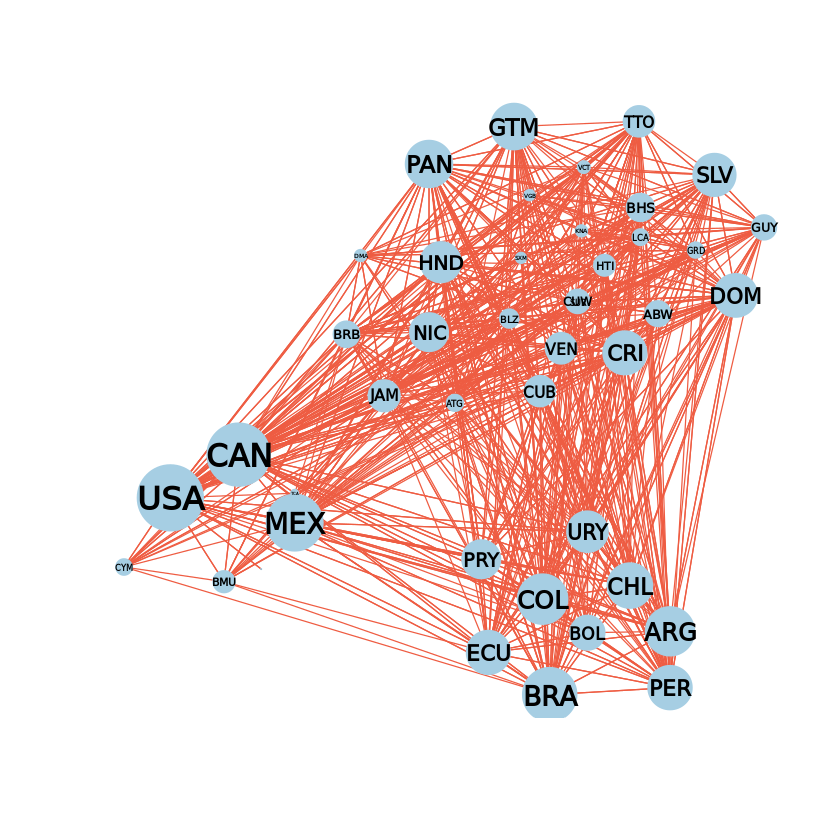

In [ ]:

# Plotting

un.Layout1 <- read.csv("data/un_layout_medi_2019_revised.csv", header=T, stringsAsFactors=FALSE, check.names=FALSE)
un.Layout <- as.matrix(un.Layout1)

 xmin <- min(un.Layout[,1])
 xmax <- max(un.Layout[,1])
 ymin <- min(un.Layout[,2])
 ymax <- max(un.Layout[,2])

## characteristics
# Compute node degrees (#links) and use that to set node size:
trade.sum <- (V(un.net)$total.value)
V(un.net)$size <- log1p((V(un.net)$total.value))*1
V(un.net)$color <- un.col

# Setting them to NA will render no labels:
V(un.net)$label.color <- "black"
V(un.net)$label <- V(un.net)$name
V(un.net)$label.cex <- log1p(V(un.net)$total.value)*0.165
V(un.net)$label.family <- "ArialMT"
V(un.net)$label.font <- 2

### Plot
g <- plot(x=un.community, y=un.net,
 			layout=un.Layout,
 			mark.groups=NULL,
 			edge.color = c("tomato2", "darkgrey")[crossing(un.community, un.net)+1],
 			edge.arrow.size=0,
 			rescale=F,
 			xlim=c(xmin,xmax),ylim=c(ymin,ymax),
 			asp=0,
 			col = un.col,
 			vertex.frame.color = un.col)



## Example Outcome

* Network structure of european countries in terms of medical trades in 2019

![Europe medical trades in 2019](images/Medi_network_2019.jpg)


In [ ]:
library(IRdisplay)

dropdown_html <- '
<select id="image_dropdown" onchange="displayImage()">
  <option value="">--Select an option--</option>
  <option value="images/Trade_Flows_circo_africa_medi_2021.jpg">Africa</option>
  <option value="images/Trade_Flows_circo_america_medi_2021.jpg">America</option>
  <option value="images/Trade_Flows_circo_asia_medi_2021.jpg">Asia</option>
  <option value="images/Trade_Flows_circo_europe_medi_2021.jpg">Europe</option>
  <option value="images/Trade_Flows_circo_Oceania_crop_2021.jpg">Oceana</option>
  <option value="images/Trade_Flows_circo_global_crop_2021.jpg">Global</option>

</select>

<br><br>

<img id="image_display" style="width:80%; height:auto;">

<script>
function displayImage() {
    var selected_image = document.getElementById("image_dropdown").value;
    if (selected_image !== "") {
        document.getElementById("image_display").src = selected_image;
    }
}
</script>
'

display_html(dropdown_html)

--Select an option-- 
 Africa 
 America 
 Asia 
 Europe 
 Oceana 
 Global

# Making maps from the network results

The following code is used to making the map from the community detection results to show the geographycally relationship between countries.

In [ ]:

## Maps for Africa commodity trading clusters

## (1) Set up - Map Colors to demonstrate cluster patterns --------------
library(tidyverse)
library(sf)
library(ggplot2)
library(ggthemes)

g <- read_csv("output/com/node_medi_19.csv") %>%
  left_join(.,read_csv("image/com/node_medi_20.csv")) %>%
  left_join(.,read_csv("image/com/node_medi_21.csv")) %>%
  left_join(.,read_csv("image/com/node_crop_19.csv") %>% select(-net.value2019)) %>%
  left_join(.,read_csv("image/com/node_crop_20.csv") %>% select(-net.value2020)) %>%
  left_join(.,read_csv("image/com/node_crop_21.csv") %>% select(-net.value2021)) %>%
  select(ISO3, Subregion, ends_with("_op"))

p <- st_read("data/Africa_Boundaries/Africa_Boundaries.shp") %>%
  rename(ISO3=ISO) %>%
  left_join(.,g) %>%
  mutate(region = factor(case_when(Subregion == "Northern Africa" ~ "Northern",
                                   Subregion == "Eastern Africa" ~ "Eastern",
                                   Subregion == "Western Africa" ~ "Western",
                                   Subregion == "Southern Africa" ~ "Southern",
                                   Subregion == "Middle Africa" ~ "Central"),
                         labels = c("Southern","Eastern","Northern","Western","Central"),
                         levels = c("Southern","Eastern","Northern","Western","Central")))




### MEDICAL MAPS ---------

pm <- p %>% select(ISO3,region,starts_with("medi")) %>%
  mutate(medi20_op = case_when(medi20_op==6 ~ 5,
                               medi20_op==5 ~ 4,
                               medi20_op==4 ~ 6,
                               TRUE ~ medi20_op)) %>%
  tidyr::pivot_longer(medi19_op:medi21_op, names_to="year",values_to="cluster") %>%
  filter(!is.na(cluster)) %>%
  mutate(Y = case_when(year=="medi19_op" ~ 2019,
                       year=="medi20_op" ~ 2020,
                       year=="medi21_op" ~ 2021))


ggplot() +
  geom_sf(data=p,fill="gray80")+
  geom_sf(data=pm, color=NA,aes(fill=factor(cluster))) +
  #scale_fill_manual(values=c("#3B7A57","#5D8AA8","#AB274F","#FF7E00","#FFBF00")) +
  scale_fill_manual(values=c("#a6cee3","#1f78b4","#33a02c",
                             "#fda24c","#ffde5c","mediumpurple4")) +
  geom_sf(data=p,size=.15,color="black",fill=NA) +
  guides(fill=guide_legend(title="Cluster")) +
  facet_wrap(~Y,nrow=1)+
  theme_map() +
  labs(title = "Africa Trade Clusters: Medical Supplies") +
  scale_x_continuous(limits = c(-25.4, 53))+
  scale_y_continuous(limits = c(-36, 38.3)) +
  theme(plot.background = element_rect(fill="white"),
        strip.text = element_text(size = 11),
        plot.title = element_text(size = 12,face="bold"),
        plot.subtitle = element_text(size=11),
        legend.text = element_text(size=10),
        legend.title = element_text(size=10.5,face="bold"),
        #plot.margin = margin(.5, .5, .5, .5, "cm"),
        legend.position = c(.0001,.0001),
        legend.background = element_blank(),
        legend.key = element_blank())

ggsave(filename="output/maps/medical_clusters.png",
       device="png",
       width=9.66,
       height=7.68,
       units="in",
       dpi=350)

 pc <- p %>% select(ISO3,region,starts_with("crop")) %>%
  mutate(crop21_op = case_when(crop21_op==5 ~ 6,
                               crop21_op==4 ~ 5,
                               TRUE ~ crop21_op)) %>%
  tidyr::pivot_longer(crop19_op:crop21_op, names_to="year",values_to="cluster") %>%
  filter(!is.na(cluster))%>%
  mutate(Y = case_when(year=="crop19_op" ~ 2019,
                       year=="crop20_op" ~ 2020,
                       year=="crop21_op" ~ 2021))


 ggplot() +
   geom_sf(data=p,fill="gray80")+
   geom_sf(data=pc, color=NA,aes(fill=factor(cluster))) +
   #scale_fill_manual(values=c("#3B7A57","#5D8AA8","#AB274F","#FF7E00","#FFBF00")) +
   scale_fill_manual(values=c("#a6cee3","#1f78b4","#33a02c",
                              "#fda24c","#ffde5c","mediumpurple4")) +
   geom_sf(data=p,size=.15,color="black",fill=NA) +
   guides(fill=guide_legend(title="Cluster")) +
   facet_wrap(~Y,nrow=1)+
   theme_map() +
   labs(title = "Africa Trade Clusters: Crops") +
   scale_x_continuous(limits = c(-25.4, 53))+
   scale_y_continuous(limits = c(-36, 38.3)) +
   theme(plot.background = element_rect(fill="white"),
         strip.text = element_text(size = 11),
         plot.title = element_text(size = 12,face="bold"),
         plot.subtitle = element_text(size=11),
         legend.text = element_text(size=10),
         legend.title = element_text(size=10.5,face="bold"),
         #plot.margin = margin(.5, .5, .5, .5, "cm"),
         legend.position = c(.0001,.0001),
         legend.background = element_blank(),
         legend.key = element_blank())

 ggsave(filename="output/maps/crop_clusters.png",
        device="png",
        width=9.66,
        height=7.68,
        units="in",
        dpi=350)


ERROR: Error in library(tidyverse): there is no package called ‘tidyverse’


# Data Science Ethics Checklist

[![Deon badge](https://img.shields.io/badge/ethics%20checklist-deon-brightgreen.svg?style=popout-square)](http://deon.drivendata.org/)

## **A. Data Collection**
<input type="checkbox" name="chk" unchecked> **A.1 Informed consent**: If there are human subjects, have they given informed consent, where subjects affirmatively opt-in and have a clear understanding of the data uses to which they consent?

 <input type="checkbox" name="chk" checked> **A.2 Collection bias**: Have we considered sources of bias that could be introduced during data collection and survey design and taken steps to mitigate those?

 - in data cleaning process, took care, using multiple dataset to avoid biased dataset (WTO/Comtrade)


 <input type="checkbox" name="chk" unchecked> **A.3 Limit PII exposure**: Have we considered ways to minimize exposure of personally identifiable information (PII) for example through anonymization or not collecting information that isn't relevant for analysis?

 <input type="checkbox" name="chk" unchecked> **A.4 Downstream bias mitigation**: Have we considered ways to enable testing downstream results for biased outcomes (e.g., collecting data on protected group status like race or gender)?

## **B. Data Storage**
 <input type="checkbox" name="chk" unchecked> **B.1 Data security**: Do we have a plan to protect and secure data (e.g., encryption at rest and in transit, access controls on internal users and third parties, access logs, and up-to-date software)?

 - open-source data


 <input type="checkbox" name="chk" unchecked> **B.2 Right to be forgotten**: Do we have a mechanism through which an individual can request their personal information be removed?

 <input type="checkbox" name="chk" checked> **B.3 Data retention plan**: Is there a schedule or plan to delete the data after it is no longer needed?
 - yes, use updated datasets


## **C. Analysis**
 <input type="checkbox" name="chk" checked> **C.1 Missing perspectives**: Have we sought to address blindspots in the analysis through engagement with relevant stakeholders (e.g., checking assumptions and discussing implications with affected communities and subject matter experts)?
 - out of scope,


 <input type="checkbox" name="chk" checked> **C.2 Dataset bias**: Have we examined the data for possible sources of bias and taken steps to mitigate or address these biases (e.g., stereotype perpetuation, confirmation bias, imbalanced classes, or omitted confounding variables)?
 - reimport/reexport, e.g., Netherland <- data scientists design codes to mitigate (not used but will apply in the future)


 <input type="checkbox" name="chk" checked> **C.3 Honest representation**: Are our visualizations, summary statistics, and reports designed to honestly represent the underlying data?

 <input type="checkbox" name="chk" unchecked> **C.4 Privacy in analysis**: Have we ensured that data with PII are not used or displayed unless necessary for the analysis?

 <input type="checkbox" name="chk" checked> **C.5 Auditability**: Is the process of generating the analysis well documented and reproducible if we discover issues in the future?

## **D. Modeling**
 <input type="checkbox" name="chk" unchecked> **D.1 Proxy discrimination**: Have we ensured that the model does not rely on variables or proxies for variables that are unfairly discriminatory?

 <input type="checkbox" name="chk" unchecked> **D.2 Fairness across groups**: Have we tested model results for fairness with respect to different affected groups (e.g., tested for disparate error rates)?

 <input type="checkbox" name="chk" checked> **D.3 Metric selection**: Have we considered the effects of optimizing for our defined metrics and considered additional metrics?
 - monetory values can be replaced by other physical mesurements
 - due to time constraints, we used optimal community algorithm for subregions and walktrap for global level


 <input type="checkbox" name="chk" checked> **D.4 Explainability**: Can we explain in understandable terms a decision the model made in cases where a justification is needed?
 - explain in the presentation


 <input type="checkbox" name="chk" checked> **D.5 Communicate bias**: Have we communicated the shortcomings, limitations, and biases of the model to relevant stakeholders in ways that can be generally understood?
- we plan to communicate in the future potential academic/industrial communications


## **E. Deployment**
 <input type="checkbox" name="chk" checked> **E.1 Redress**: Have we discussed with our organization a plan for response if users are harmed by the results (e.g., how does the data science team evaluate these cases and update analysis and models to prevent future harm)?
- our outcomes are descriptive, xxx


 <input type="checkbox" name="chk" unchecked> **E.2 Roll back**: Is there a way to turn off or roll back the model in production if necessary?

 <input type="checkbox" name="chk" checked> **E.3 Concept drift**: Do we test and monitor for concept drift to ensure the model remains fair over time?
 - yes


 <input type="checkbox" name="chk" unchecked> **E.4 Unintended use**: Have we taken steps to identify and prevent unintended uses and abuse of the model and do we have a plan to monitor these once the model is deployed?


*Data Science Ethics Checklist generated with [deon](http://deon.drivendata.org).*